In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# Step 1: Load the MNIST Dataset

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Normalize the dataset

x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
print(f'Num of train images: {x_train.shape[0]}\nNum of test images: {x_test.shape[0]}')

Num of train images: 60000
Num of test images: 10000


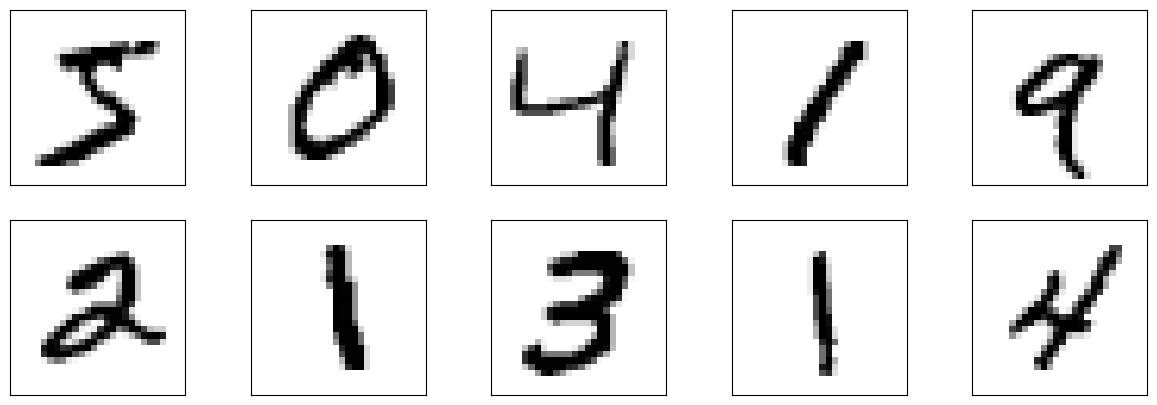

In [ ]:
# show 10 images from train data

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)


In [ ]:
# Step 2: Define a mask (edge detection filter)

mask = np.array([[-1, -1, -1],
                 [-1,  8, -1],
                 [-1, -1, -1]])

In [ ]:
# Step 3: Function to apply the filter (mask) to all images

def apply_filter_to_dataset(dataset, mask):
    filtered_dataset = []
    for img in dataset:
        # Apply the mask/filter using convolution
        filtered_img = cv2.filter2D(img, -1, mask)
        # Expand dimensions to match CNN input shape (28, 28, 1)
        filtered_img = np.expand_dims(filtered_img, axis=-1)
        filtered_dataset.append(filtered_img)
    return np.array(filtered_dataset)

In [ ]:
# Apply the filter to both training and testing data

x_train_filtered = apply_filter_to_dataset(x_train, mask)
x_test_filtered = apply_filter_to_dataset(x_test, mask)

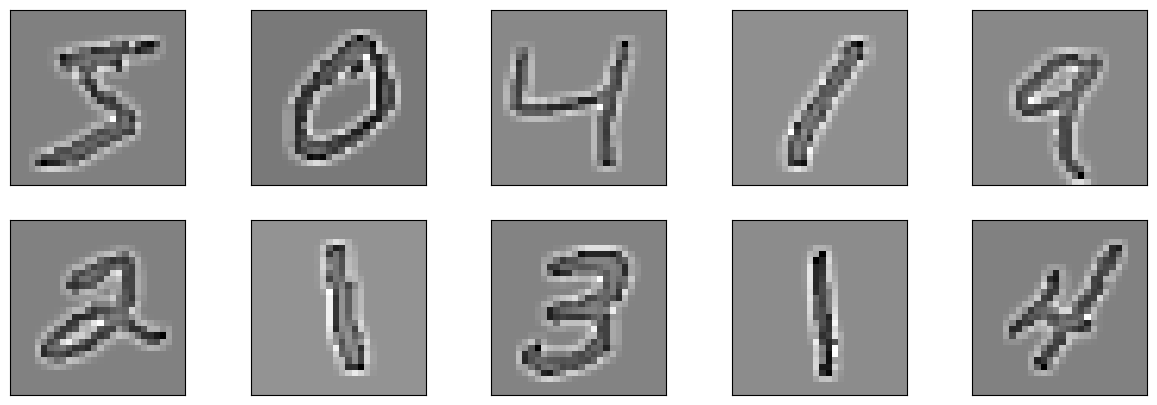

In [ ]:
#show 10 images from train data after applyed filter

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_filtered[i].squeeze(), cmap=plt.cm.binary)

In [ ]:
# Step 4: Build the CNN Model
model = Sequential()

# First convolutional layer with ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer with Sigmoid activation
model.add(Conv2D(64, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layer with Tanh activation
model.add(Dense(128, activation='tanh'))

# Output layer for classification (Softmax for multi-class classification)
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
Earrly_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=4)

In [ ]:
# Step 5: Train the model using the filtered dataset
history = model.fit(x_train_filtered, y_train, epochs=100,batch_size=1000 ,validation_split=0.2,callbacks=Earrly_stop)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.2254 - loss: 2.3943 - val_accuracy: 0.7458 - val_loss: 1.2969
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7770 - loss: 1.0328 - val_accuracy: 0.9078 - val_loss: 0.4314
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9145 - loss: 0.3894 - val_accuracy: 0.9471 - val_loss: 0.2364
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9466 - loss: 0.2252 - val_accuracy: 0.9594 - val_loss: 0.1649
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9596 - loss: 0.1610 - val_accuracy: 0.9668 - val_loss: 0.1276
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9672 - loss: 0.1276 - val_accuracy: 0.9721 - val_loss: 0.1060
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9735 - loss: 0.1040 - val_accuracy: 0.9736 - val_loss: 0.0938
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9771 - loss: 0.0905 - val_accuracy: 0.

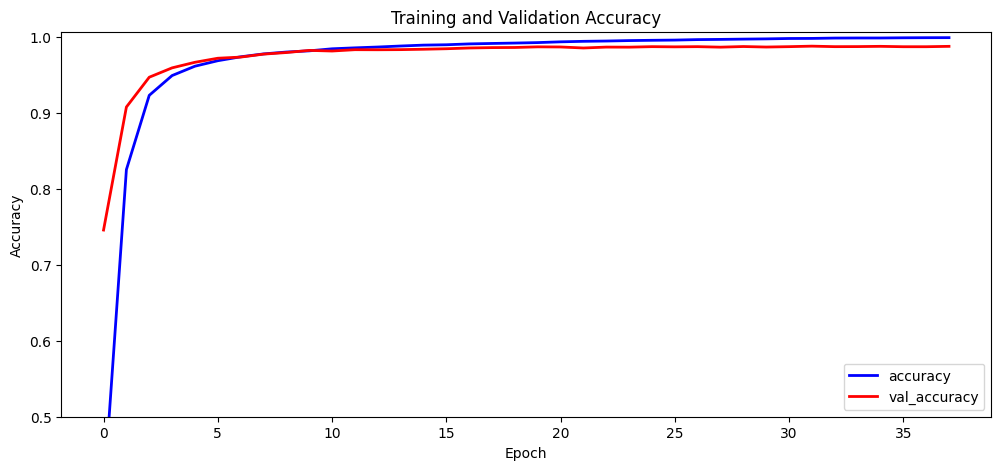

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(history.history['accuracy'], label='accuracy',c='b',linewidth=2)
plt.plot(history.history['val_accuracy'], label = 'val_accuracy',c='r',linewidth=2)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.007])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test_filtered, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9887 - loss: 0.0364


In [ ]:
print(f'\nTest Accuracy: {test_acc*100:.2f}% \nTest Loss: {test_loss:0.2f}%')


Test Accuracy: 99.11% 
Test Loss: 0.03%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


<Axes: >

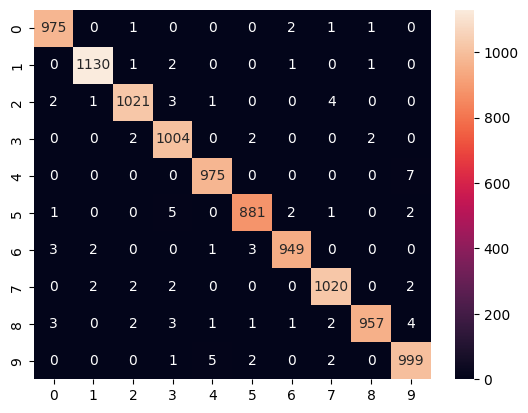

In [ ]:
# confusion_matrix

sns.heatmap(confusion_matrix(y_test, model.predict(x_test_filtered).argmax(axis=1)), annot=True, fmt='g')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


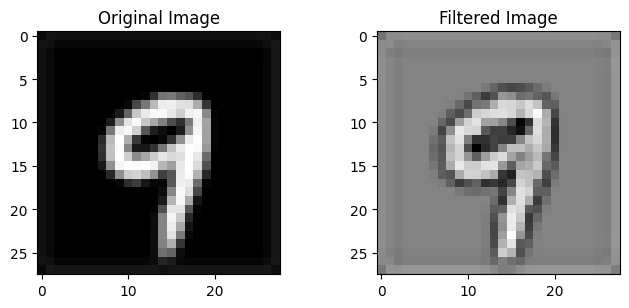


Predicted Digit:  9


In [ ]:
#from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

# Load your trained model
#model = load_model("path_to_your_model.h5")

# Load and preprocess the image
path="/content/images.jpeg"
image = Image.open(path).convert("L")  # Convert to grayscale
image = image.resize((28, 28))  # Resize to 28x28
image_array = np.array(image) / 255.0  # Normalize
image_array=cv2.filter2D(image_array, -1, mask)
image_array = image_array.reshape(1, 28, 28, 1)  # Add batch and channel dimensions

# Predict the class
prediction = model.predict(image_array).argmax()


#Show Original Image and Filtered Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image,cmap=plt.cm.binary)

plt.subplot(1, 2, 2)
plt.title('Filtered Image')
plt.imshow(image_array.squeeze(), cmap=plt.cm.binary)
plt.tight_layout(w_pad=5)
plt.show()

print(f"\nPredicted Digit:  {prediction}")

In [ ]:
# model.save('model.h5')

**[Open Deployment](https://digit-classification-dep.streamlit.app/)**